In [1]:
# load helper functions for uncertainity detection
import helper
#set default settings for the notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
#set file name
file = "traffic_fines"

In [3]:
# load event data in dataframe and convert to log 
df = helper.load_data(file)
log = helper.convert_df_to_log(df)

In [4]:
#load freq variants and calculate threshold prefix length
variants, variants_count = helper.get_variants_dict(log)
threshold_prefix, freq_variants = helper.get_threshold_prefix(df,variants_count)

Threshold Prefix Length: 5


In [5]:
#test
data = helper.get_test_data_segment_analysis(threshold_prefix,file,df)

Calculating Relative Error for prefixes of length 2 3
Calculating Relative Error for prefixes of length 3 4
Calculating Relative Error for prefixes of length 4 5


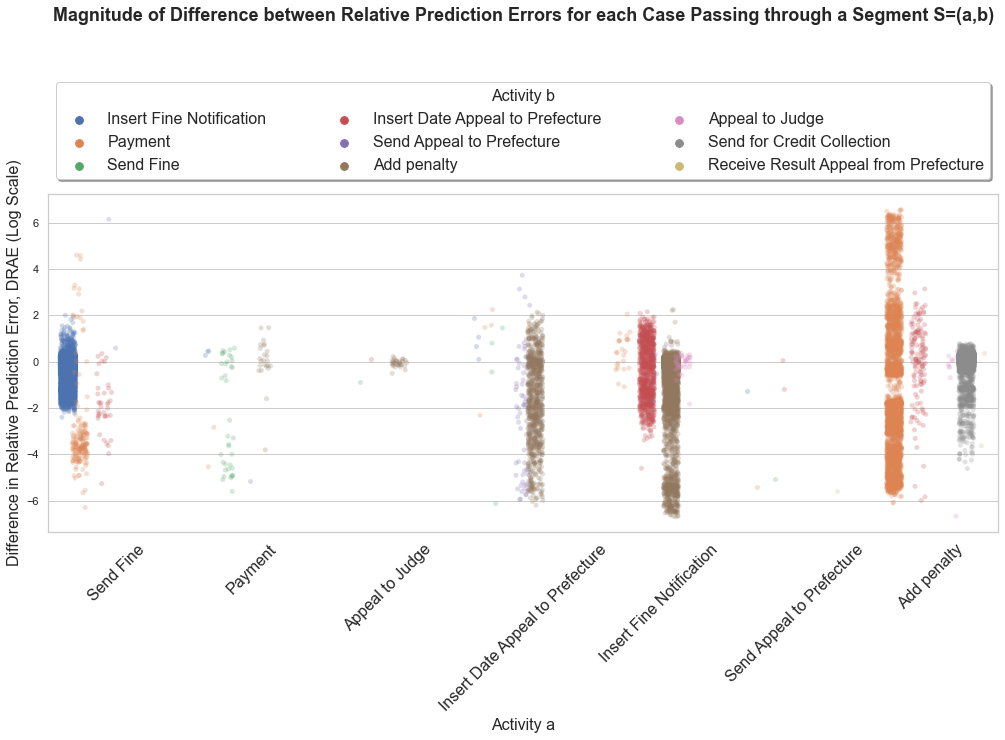

In [9]:
#create scatter plot for getting overview of uncertainity in segments of the event log
helper.create_segment_uncertainity_plot(data,file,"test")

In [6]:
#detect subset of segments, i.e., uncertain segments with inter-case dynamics
uncertain_segments,size_df,seg_df = helper.get_uncertain_most_segments(data)
uncertain_segments

[('Add penalty', 'Send for Credit Collection'),
 ('Insert Fine Notification', 'Add penalty'),
 ('Send Fine', 'Insert Fine Notification')]

(14324, 3)
Number of events in Segment: (9794, 2)
(14363, 3)
(14363, 3)
(14363, 3)
Number of events in Segment: (12112, 2)
(14552, 3)
(14552, 3)
(14552, 3)
Number of events in Segment: (12112, 2)


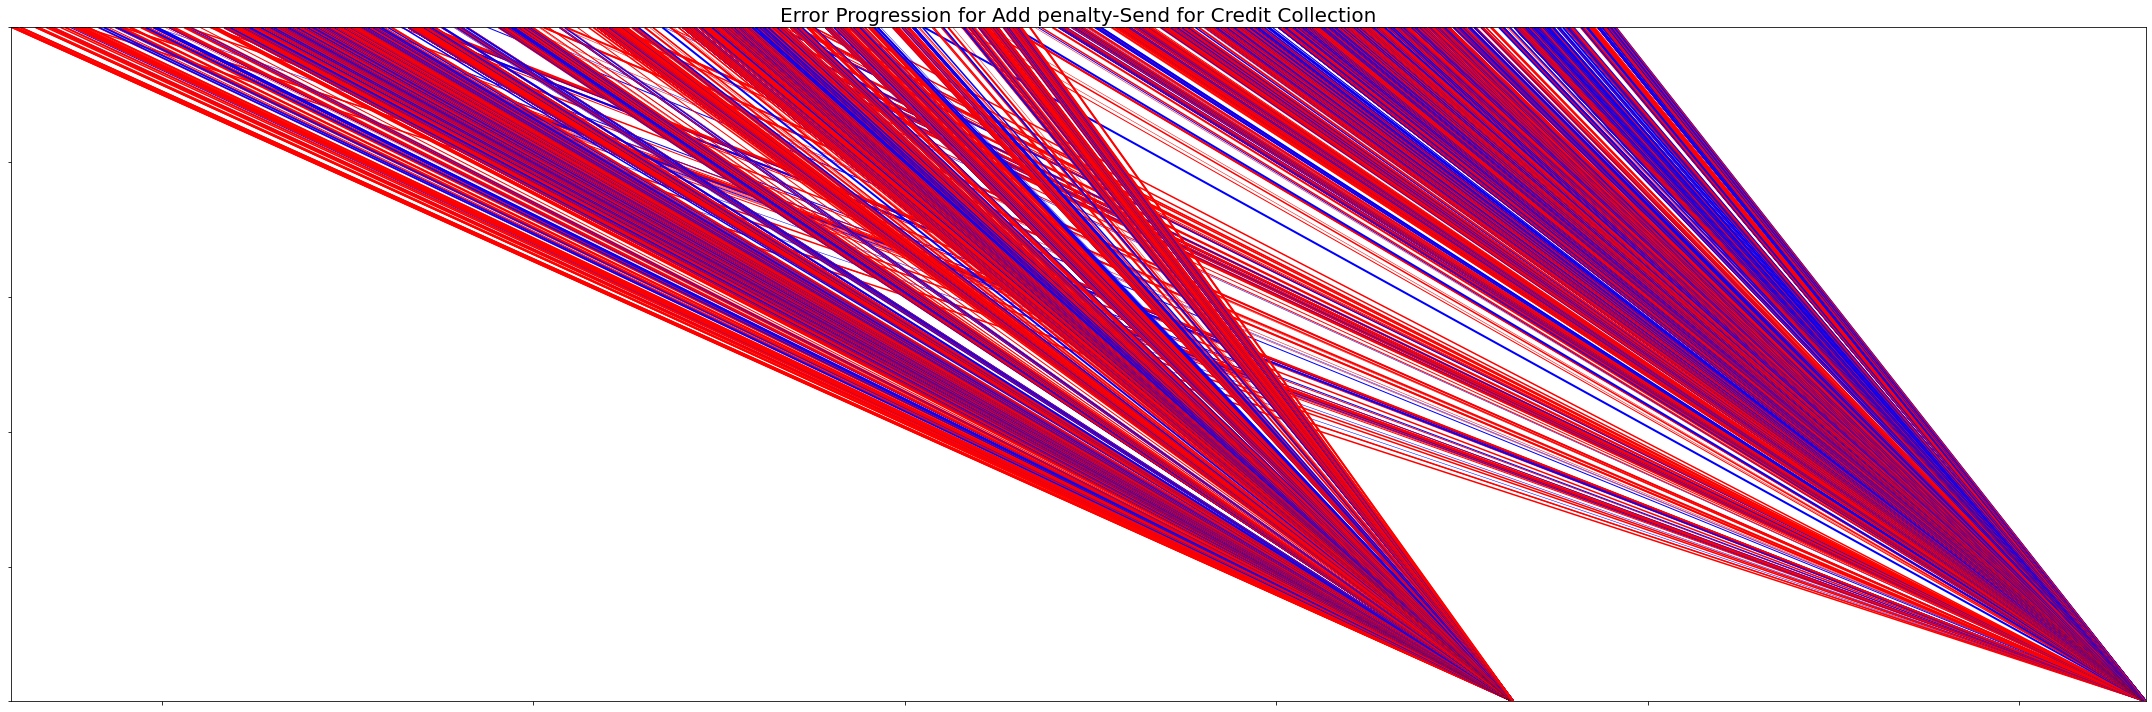

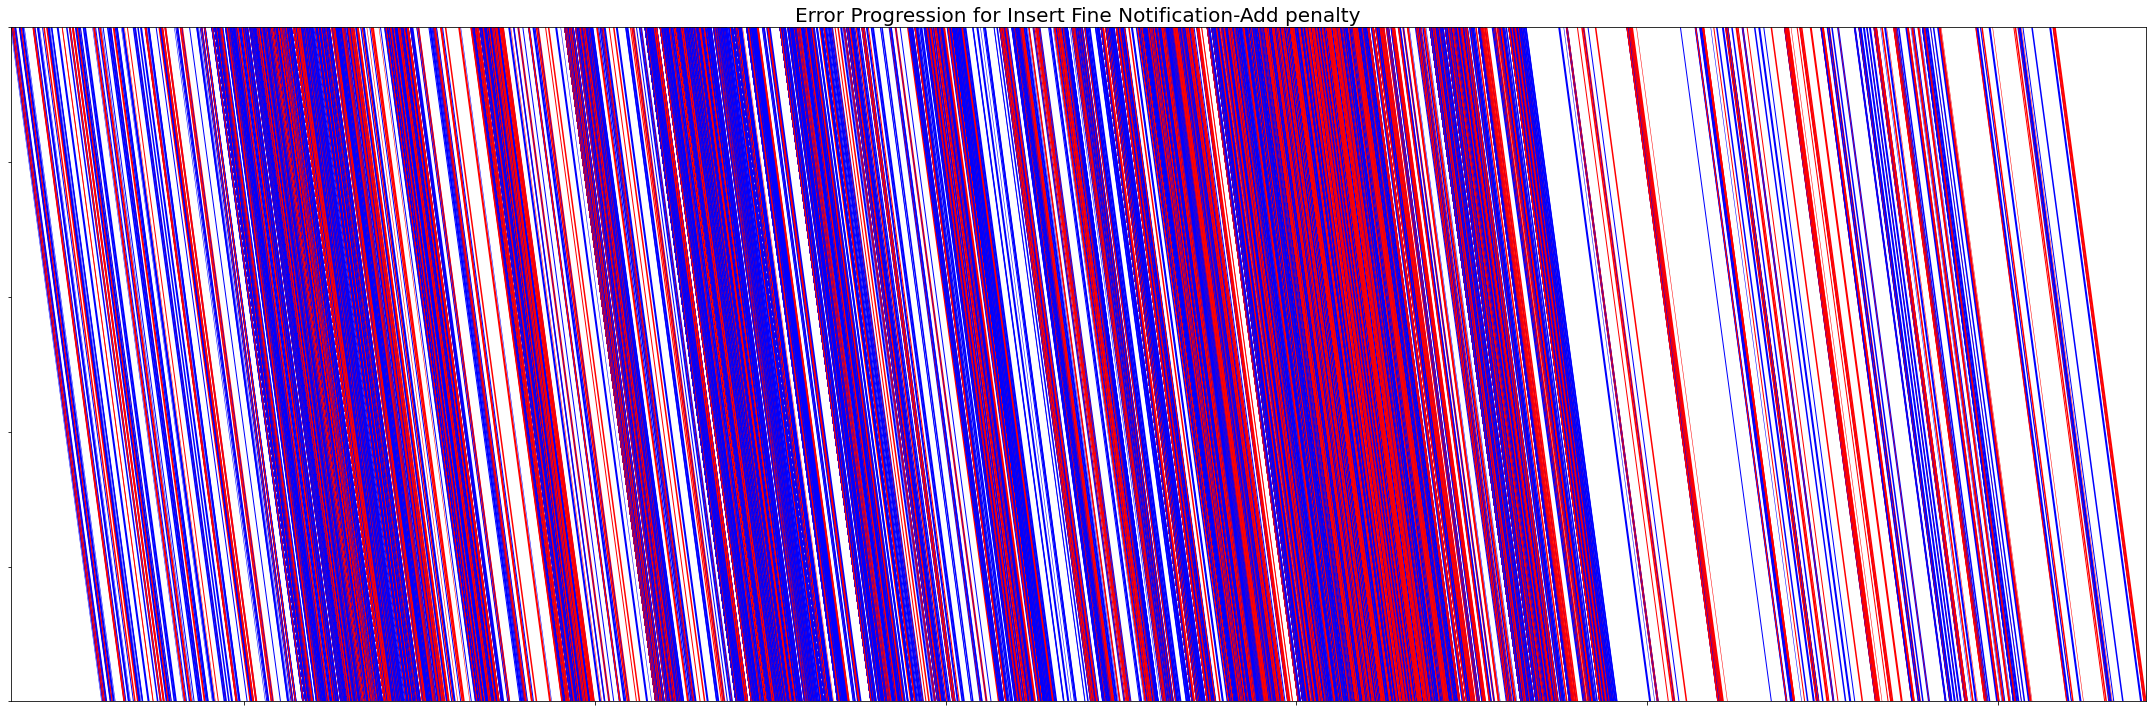

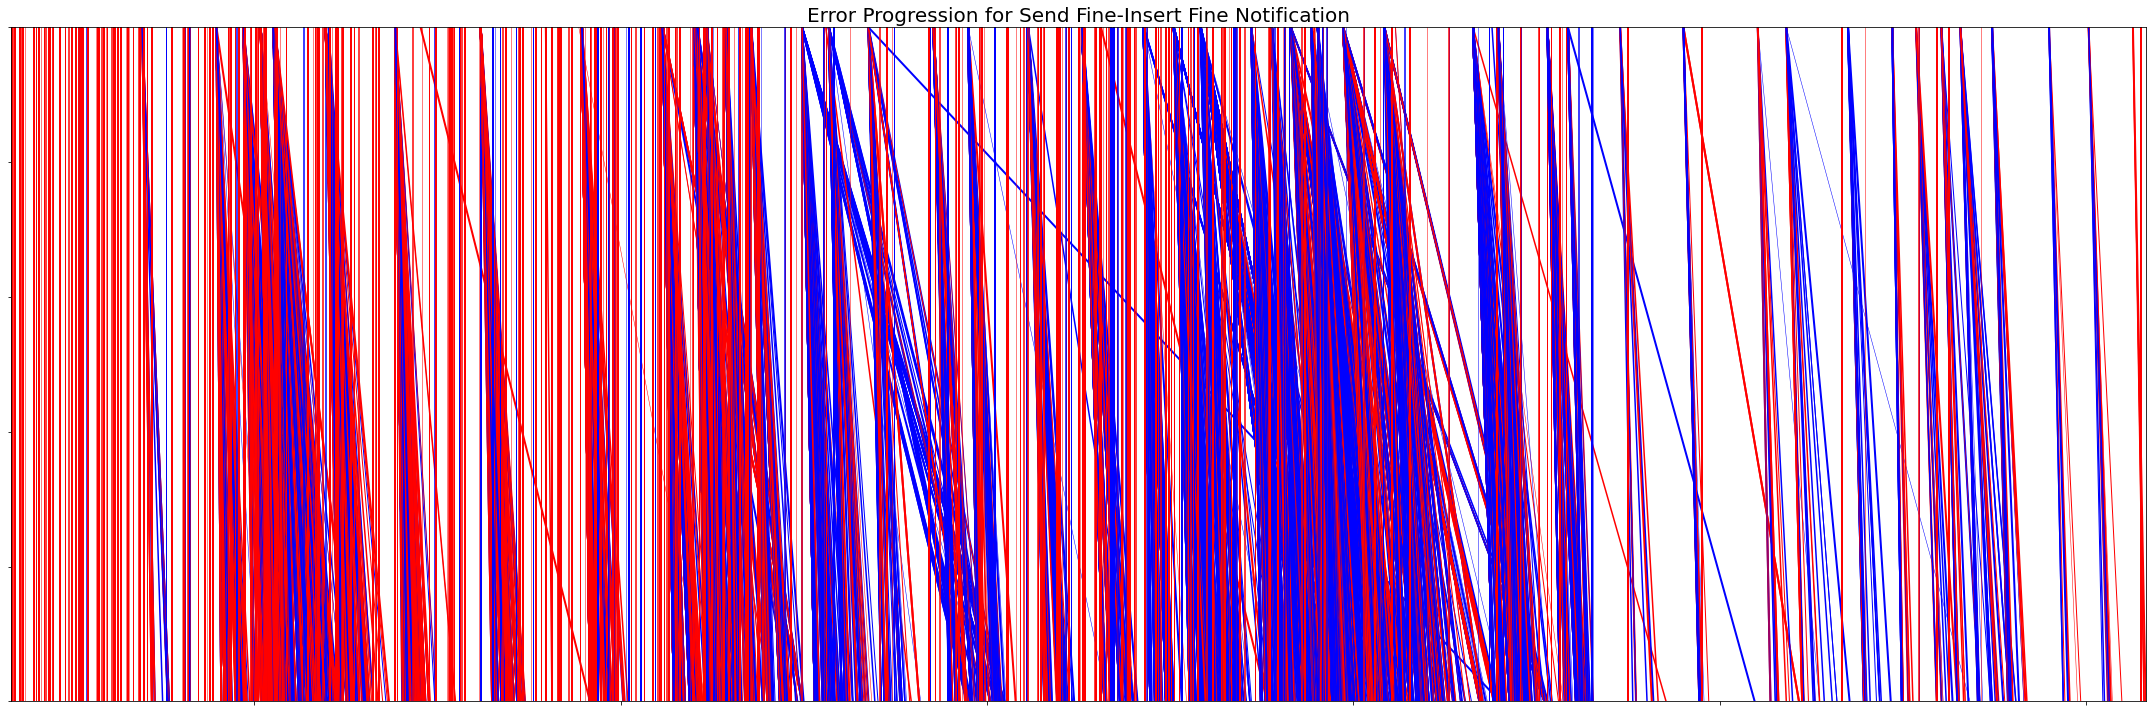

In [8]:
#create performance spectrum with error progression for inspecting patterns related to intre-case dynamics
for a1,a2 in uncertain_segments:
    if(a1!=a2):
        fq= helper.get_relevant_variants(a1,a2,freq_variants)
        all_cases = []
        final_colormap = {}
        for var,p1,p2 in fq:
            relevant_cases = helper.get_relevant_cases(df, [var])
            df_a1, cases_p1, rae = helper.get_relative_error_test(relevant_cases,p1,p2,file)
            cases, colormap = helper.build_colormap(df_a1, cases_p1,rae)
            all_cases+=cases
            final_colormap.update(colormap)
    #     len(all_cases), len(final_colormap)
        data = df[df["Case ID"].isin(all_cases)]
#         print(data.head())
        helper.plot_error_progression(data,a1,a2,all_cases,final_colormap,file)